# Laboratorio 4: Spark y EDA 🐼

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Catherine Benavides
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Maximiliano Quintero
- Nombre de alumno 2: Tomás Apablaza


### **Link de repositorio de GitHub:** `https://github.com/Repositivo/Repositivo.git`

### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 7 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos Y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false

## Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

> 1) Es un motor unificador , para el procesamiento de grandes volumenes de datos, tanto en físico como en nube. Su funcionamiento se fundamenta principalmente en computación paralela. Las principales ventajas en comparación a Pandas es que, pyspark se carateriza por su gran escalabilidad y uso eficiente de los datos a través de la RAM. Por otro lado Pandas no esta optimizado para realizar computación en paralelo.

> 2) Es una Colección distribuida e inmutable de elementos (dataframes) que constituye el pilar fundamental de spark. Este modelo de datos permite a Spark la realización de computación en paralelo, distribuyendo los datos a través de clusters que ejecutan operaciones en paralelo. Los daframes por tanto se distribuyen en particiones en para procesarlos en paraleo en vez de forma serializada.

> 3) Las transformaciones principalmente, generan un dataframe nuevo a partir de uno existente, sin modificar el dataframe original, en cambio, las acciones son operaciones que ejecutan las transformaciones acumuladas. Por ejemplo: sobre un dataframe puedo aplicar agrupaciones o selección de variables lo que son ambas transformaciones, pero luego con el metodo show() desencadena esas transformaciones acumaladas, que consolidan la información a través de tablas.

> 4) Como Spark se fundamenta en la computación paralela, el particionamiento promueve el paralelismo dado que, al distribuir los datos en segmentos o particiones, se facilita que los ejecutores (executors) de Spark procesen datos que se encuentran físicamente más próximos a ellos, reduciendo así el uso del ancho de banda necesario para la transferencia de datos. De este modo, a cada núcleo de procesamiento de un ejecutor se le asigna una partición específica sobre la cual trabajar, maximizando la eficiencia del procesamiento y minimizando el tiempo de ejecución.

> 5)  Como spark trabaja de manera paralela, la lista de tareas y operaciones paralelas se realizan y coordinan a través de un programa conductor, Spark Driver, el cual instancia una Spark Session que es la comunicación de este conductor con los componentes distribuidos y la optimizacion de recursos que serán utlizados por los ejecutores, los Spark Executor´s, los cuales son responsables de llevar a cabo las tareas asignadas por el conductor en los nodos de trabajo, procesando datos y devolviendo los resultados al conductor.

> 6) Spark permite la utilización de SQL, con la sintaxis de uso básico, el cual esta optimizado con Catalyst. El cual sigue los siguientes pasos para optimizar consultas, entre ellos, 1) Analisis: Crea un Arbol para examinar la estructura de tablas y las operaciones, 2) Optimización lógica: Genera múltiples planes ejecución posbile, para optimizar de manera lógica. 3) Planificación física: Con el mejor plan lógico, se seleccionan los operadores físicos para ejecutar la consulta y 4) Generacón de código: Se ejecuta Java optimizado en cada cluster.



## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [3]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

  Using cached pyspark-3.5.1.tar.gz (317.0 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=fbaa6baa04c057da19f3cd9c753e9d09230ce5b4090fbcba00925053f24c2955
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [4]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Cargue los datos usando **pyspark**

In [5]:
%%capture
!wget https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
!wget -O object.pkl https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false


In [6]:
sparksession = SparkSession.builder.master("local").appName("Lab4").getOrCreate()

df = (
    sparksession.read
    .load(
        "datos_lab_spark.parquet",
        format="parquet",
        #sep=",",
        inferSchema="true",
        header="true"
    )
)

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [7]:
from pyspark.sql.functions import when, rand, col, sum

def limpieza(df):
  #1
  print("1) Se revisa la estructura de datos:")
  df.printSchema()
  #2
  print("2) Se muestran las 10 primeras filas:")
  df.show(10)
  #3
  print("3) Se imprime un muestreo aleatorio con el 5% de los datos:")
  df.sample(fraction=0.05, seed=3).show()
  #4
  print("4) Se revisan los tipos de datos:")
  print(df.dtypes)
  print("Se puede notar que, al observar los datos, las columnas 'Quantity','Customer Age','Is an Alien','Account Age Days' y 'Transaction Hour' deberían ser de tipo int.")
  #5
  print("5) Se revisan los tipos de datos una vez cambiados los problemáticos:")
  def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df
  cols_to_cast = {"Quantity": IntegerType(),
                  "Customer Age": IntegerType(),
                  "Is An Alien": IntegerType(),
                  "Account Age Days": IntegerType(),
                  "Transaction Hour": IntegerType()}
  df = cast_columns(df, cols_to_cast)
  print(df.dtypes)
  #6
  print("6) Cantidad de nulos por columna:")
  exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]
  df.agg(*exprs).show()
  #7
  print("7) Eliminar valores nulos:")
  print("Data sin eliminar nulos:",df.count())
  df = df.na.drop()
  print("Data con nulos eliminados:",df.count() )
  exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]
  df.agg(*exprs).show()
  #8
  print("8) Eliminar valores duplicados:")
  print("Data sin eliminar duplicados:",df.count())
  df = df.dropDuplicates()
  print("Data con duplicados eliminados:",df.count())
  return df

df_limpio = limpieza(df)

1) Se revisa la estructura de datos:
root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)

2) Se muestran las 10 primeras filas:
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+-------------

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 5 productos o menos.
  * Compra mayorista: 6 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [8]:
from pyspark.sql.functions import col, log, pow, abs, month

def transformar(df):
  # 1
  print("1) Crear la columna 'Transaction bp'")
  df=df.withColumn('Transaction bp',log(48 + abs(pow(df['Transaction Amount'],36))))
  df.show(5)
  # 2
  print("2) Crear la columna 'Transaction Month'")
  df=df.withColumn('Transaction Month',month(df["Transaction Date"]))
  df.show(5)
  # 3
  print("3) Crear la variable 'Type of purchase'")
  df = df.withColumn("Type of purchase", when(df["Quantity"] < 6, "Minorista").otherwise("Mayorista"))
  df.show(5)
  # 4
  print("4) Se imprimen los registros de compras hechas por alienígenas en el comecio mayorista")
  df.filter((df['Is An Alien']==1) & (df['Type of purchase']=="Mayorista")).show()
  # 5
  print("5) Se imprimen la cantidad de compras realizadas por seres humanos y por aliens por separado")
  df.groupBy(['Is An Alien']).agg({'Transaction ID':'count'}).show()
  # 6
  print("6) Se imprimen la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas")
  df.groupBy("Product Category").pivot("Is An Alien").mean("Transaction Amount").show()
  return df

df_transformado = transformar(df_limpio)

1) Crear la columna 'Transaction bp'
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|8441d125-c6b8-444...|8be8b3cb-1102-42f...|             73.19|2020-07-09 00:00:00|        PayPal

### 4. EDA [18 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas**: Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas**:
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas**:
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones**:
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

1) Transformar DataFrame transformado a formato pandas:
                         Transaction ID                           Customer ID  \
0  8441d125-c6b8-4441-ade7-8c2afec0823e  8be8b3cb-1102-42f4-82da-81b911248b11   
1  25aaaf63-f8c4-45da-a7dc-7c13c0a64f59  faec099b-02ac-44c0-9ad3-91e0f1290b16   
2  04cf3438-6677-4251-a62a-0fb76b37ed5c  a87dba6b-6f39-4482-9f36-893acbb872b3   
3  dc12a480-1d0f-48bc-92c5-7b25223483af  88ce4cae-95cd-482d-970c-0aea23f2df79   
4  e551b7d9-9388-4d81-bd34-5aaf30fc6aa1  1add854f-9d94-46dc-8b89-c9a5d8d4eb76   

   Transaction Amount Transaction Date Payment Method Product Category  \
0               73.19       2020-07-09         PayPal     toys & games   
1              327.76       2024-07-30         PayPal  health & beauty   
2              142.17       2022-07-16    credit card    home & garden   
3               64.13       2019-08-09  bank transfer         clothing   
4              273.13       2021-10-22         PayPal  health & beauty   

   Quantity 

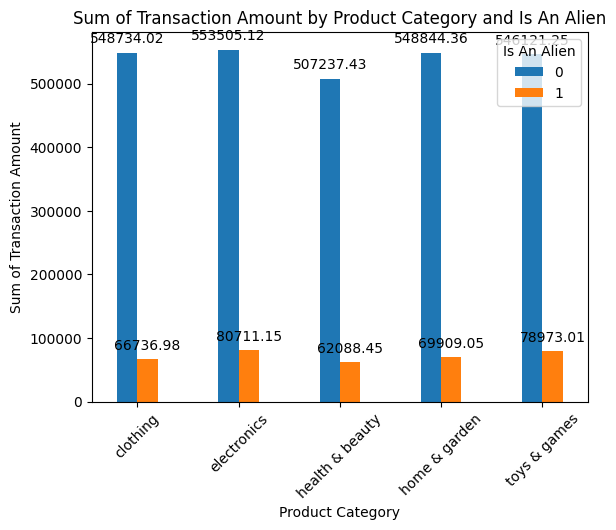

Se puede observar que los humanos gastan una cantidad equilibrada en los diferentes categorías de productos, mientras que los aliens tienen un mayor gasto en dispositivos electronicos y juegos. Ambos grupos gastan menos en salud y belleza.
2.2) Gráfico de Monto de Trasacción según Método de Pago


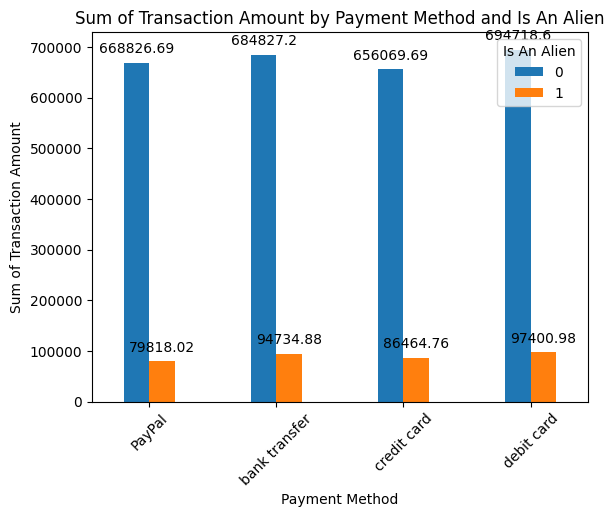

Se  puede observar que ambos grupos tiene una leve preferencia por la tarjeta de débito y la transferencia bancaria.
2.3) Gráfico Monto de Trasacción según Dispositivo Utilizado


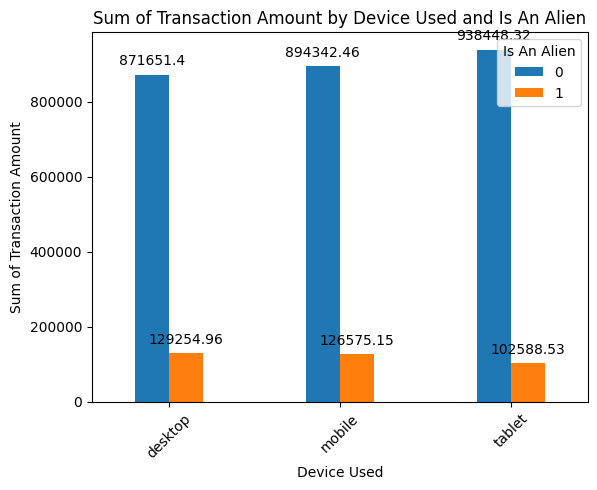

Los aliens gastan más comprando por el computador, mientras que los humanos comprando por la tablet
3.1) Distribución de Monto de Transacción según Es Alien


<ipython-input-9-fee84f5212f8>:77: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group0, label='No Alien')
<ipython-input-9-fee84f5212f8>:78: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group1, label='Is Alien')


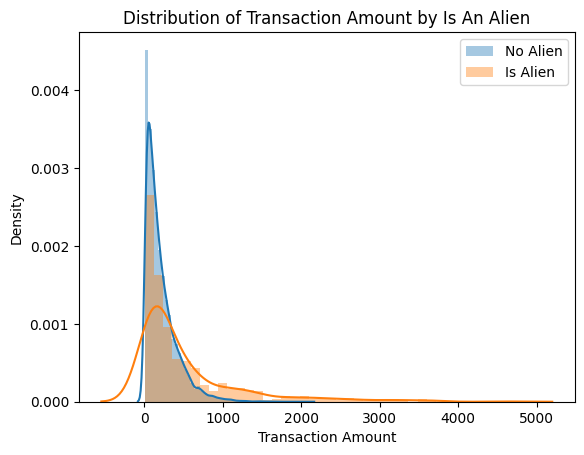

Se puede apreciar que los humanos suelen a realizar más compras de montos menores a 800 USD aprox en comparación a los aliens, mientras que los aliens suelen realizar más compras de montos mayores a 800 USD que los humanos.
3.2) Distribución de Antiguedad de la Cuenta según Es Alien


<ipython-input-9-fee84f5212f8>:93: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group0, label='No Alien')
<ipython-input-9-fee84f5212f8>:94: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group1, label='Is Alien')


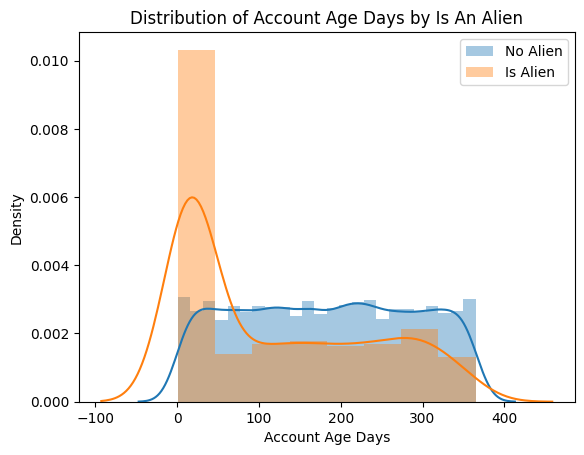

Se puede apreciar que los aliens suelen tener cuentas menos antiguas (menor a 50 días) en proporción comparada con los humanos, que tienen una distribución más pareja entre los 0 y 350 días
3.3) Distribución de Edad según Es Alien


<ipython-input-9-fee84f5212f8>:109: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group0, label='No Alien')
<ipython-input-9-fee84f5212f8>:110: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(group1, label='Is Alien')


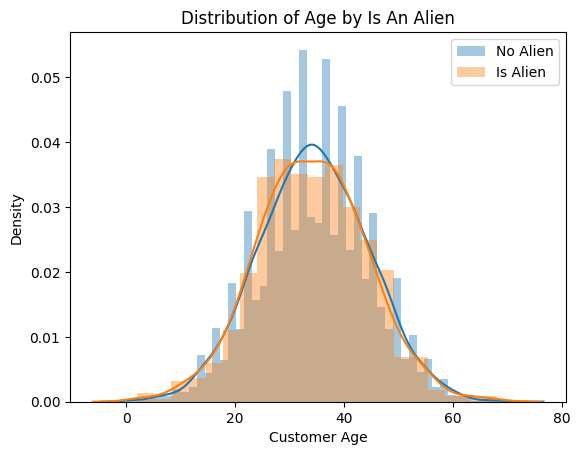

La distribución de edad de aliens es muy similar a la de los humanos


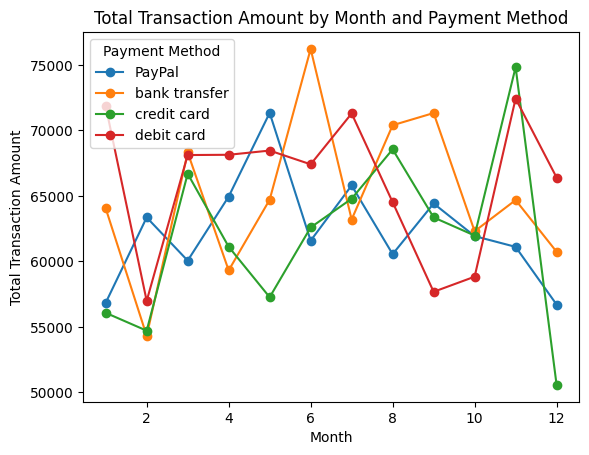

Se puede observar que la trasnferencia bancaria tiene mayores montos de compra en junio en comparación al resto, y la tarjeta de crédito sufrió un gran caida de compras en Diciembre.


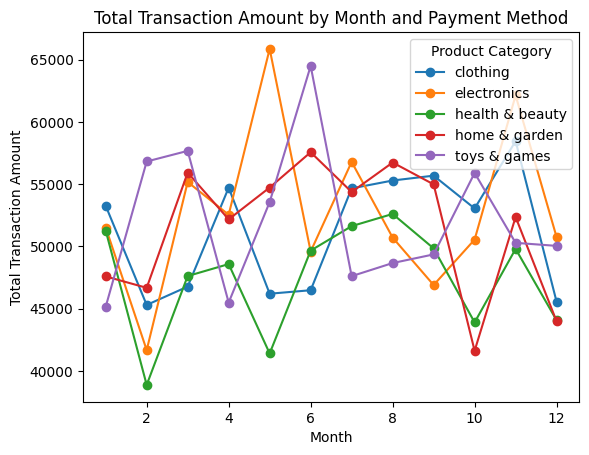

Los productos electronicos se suelen comprar más en comparación al resto en Mayo y Noviembre, los juguetes y juegos en Febrero y Junio.


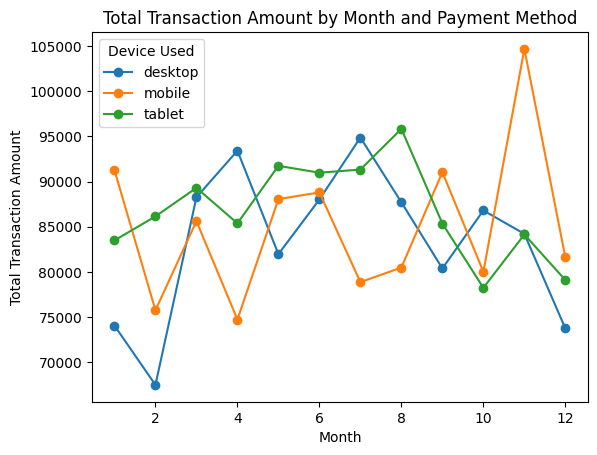

 En febrero se puede apreciar una reducción notable en el uso de computador para comprar, y en noviembre se puede apreciar un gran aumento en el uso del telefono.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def eda(df):
  # 1
  print("1) Transformar DataFrame transformado a formato pandas:")
  df = df.toPandas()
  print(df.head())

  # 2

  # 2.1
  print("2.1) Gráfico de Monto de Trasacción según Categoría de Producto")
  # Agrupar por "Payment Method" y "Is An Alien" y calcular la suma de "Transaction Amount"
  grouped = df.groupby(['Product Category', 'Is An Alien'])['Transaction Amount'].sum().unstack()
  # Crear el gráfico de barras agrupado
  ax = grouped.plot(kind='bar', position=0.5, width=0.4)
  # Agregar etiquetas de valor en cada barra
  for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
  # Agregar etiquetas de categoría en el eje x
  ax.set_xticklabels(grouped.index, rotation=45)
  # Agregar etiquetas y título
  plt.xlabel('Product Category')
  plt.ylabel('Sum of Transaction Amount')
  plt.title('Sum of Transaction Amount by Product Category and Is An Alien')
  # Mostrar el gráfico
  plt.show()
  print("Se puede observar que los humanos gastan una cantidad equilibrada en los diferentes categorías de productos, mientras que los aliens tienen un mayor gasto en dispositivos electronicos y juegos. Ambos grupos gastan menos en salud y belleza.")

  # 2.2
  print("2.2) Gráfico de Monto de Trasacción según Método de Pago")
  # Agrupar por "Payment Method" y "Is An Alien" y calcular la suma de "Transaction Amount"
  grouped = df.groupby(['Payment Method', 'Is An Alien'])['Transaction Amount'].sum().unstack()
  # Crear el gráfico de barras agrupado
  ax = grouped.plot(kind='bar', position=0.5, width=0.4)
  # Agregar etiquetas de valor en cada barra
  for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
  # Agregar etiquetas de categoría en el eje x
  ax.set_xticklabels(grouped.index, rotation=45)
  # Agregar etiquetas y título
  plt.xlabel('Payment Method')
  plt.ylabel('Sum of Transaction Amount')
  plt.title('Sum of Transaction Amount by Payment Method and Is An Alien')
  # Mostrar el gráfico
  plt.show()
  print("Se  puede observar que ambos grupos tiene una leve preferencia por la tarjeta de débito y la transferencia bancaria.")

  # 2.3
  print("2.3) Gráfico Monto de Trasacción según Dispositivo Utilizado")
  # Agrupar por "Payment Method" y "Is An Alien" y calcular la suma de "Transaction Amount"
  grouped = df.groupby(['Device Used', 'Is An Alien'])['Transaction Amount'].sum().unstack()
  # Crear el gráfico de barras agrupado
  ax = grouped.plot(kind='bar', position=0.5, width=0.4)
  # Agregar etiquetas de valor en cada barra
  for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
  # Agregar etiquetas de categoría en el eje x
  ax.set_xticklabels(grouped.index, rotation=45)
  # Agregar etiquetas y título
  plt.xlabel('Device Used')
  plt.ylabel('Sum of Transaction Amount')
  plt.title('Sum of Transaction Amount by Device Used and Is An Alien')
  # Mostrar el gráfico
  plt.show()
  print("Los aliens gastan más comprando por el computador, mientras que los humanos comprando por la tablet")

  # 3

  # 3.1
  print("3.1) Distribución de Monto de Transacción según Es Alien")
  # Dividir el DataFrame en dos grupos basados en "Is An Alien"
  group0 = df[df['Is An Alien'] == 0]['Transaction Amount']
  group1 = df[df['Is An Alien'] == 1]['Transaction Amount']
  # Crear los distplots para cada grupo
  sns.distplot(group0, label='No Alien')
  sns.distplot(group1, label='Is Alien')
  # Agregar título
  plt.title("Distribution of Transaction Amount by Is An Alien")
  # Agregar leyenda
  plt.legend()
  # Mostrar el gráfico
  plt.show()
  print("Se puede apreciar que los humanos suelen a realizar más compras de montos menores a 800 USD aprox en comparación a los aliens, mientras que los aliens suelen realizar más compras de montos mayores a 800 USD que los humanos.")

  # 3.2
  print("3.2) Distribución de Antiguedad de la Cuenta según Es Alien")
  # Dividir el DataFrame en dos grupos basados en "Is An Alien"
  group0 = df[df['Is An Alien'] == 0]['Account Age Days']
  group1 = df[df['Is An Alien'] == 1]['Account Age Days']
  # Crear los distplots para cada grupo
  sns.distplot(group0, label='No Alien')
  sns.distplot(group1, label='Is Alien')
  # Agregar título
  plt.title("Distribution of Account Age Days by Is An Alien")
  # Agregar leyenda
  plt.legend()
  # Mostrar el gráfico
  plt.show()
  print("Se puede apreciar que los aliens suelen tener cuentas menos antiguas (menor a 50 días) en proporción comparada con los humanos, que tienen una distribución más pareja entre los 0 y 350 días")

  # 3.3
  print("3.3) Distribución de Edad según Es Alien")
  # Dividir el DataFrame en dos grupos basados en "Is An Alien"
  group0 = df[df['Is An Alien'] == 0]['Customer Age']
  group1 = df[df['Is An Alien'] == 1]['Customer Age']
  # Crear los distplots para cada grupo
  sns.distplot(group0, label='No Alien')
  sns.distplot(group1, label='Is Alien')
  # Agregar título
  plt.title("Distribution of Age by Is An Alien")
  # Agregar leyenda
  plt.legend()
  # Mostrar el gráfico
  plt.show()
  print("La distribución de edad de aliens es muy similar a la de los humanos")

  # 4

  # 4.1
  # Agrupar por mes y por "Payment Method" y calcular la suma de "Transaction Amount"
  grouped = df.groupby(['Transaction Month', 'Payment Method'])['Transaction Amount'].sum().unstack()
  # Crear el gráfico de líneas agrupado por mes
  grouped.plot(kind='line', marker='o')
  # Agregar etiquetas y título
  plt.xlabel('Month')
  plt.ylabel('Total Transaction Amount')
  plt.title('Total Transaction Amount by Month and Payment Method')
  # Mostrar el gráfico
  plt.show()
  print("Se puede observar que la trasnferencia bancaria tiene mayores montos de compra en junio en comparación al resto, y la tarjeta de crédito sufrió un gran caida de compras en Diciembre.")

  # 4.2
  # Agrupar por mes y por "Product Category" y calcular la suma de "Transaction Amount"
  grouped = df.groupby(['Transaction Month', 'Product Category'])['Transaction Amount'].sum().unstack()
  # Crear el gráfico de líneas agrupado por mes
  grouped.plot(kind='line', marker='o')
  # Agregar etiquetas y título
  plt.xlabel('Month')
  plt.ylabel('Total Transaction Amount')
  plt.title('Total Transaction Amount by Month and Payment Method')
  # Mostrar el gráfico
  plt.show()
  print("Los productos electronicos se suelen comprar más en comparación al resto en Mayo y Noviembre, los juguetes y juegos en Febrero y Junio.")

  # 4.3
  # Agrupar por mes y por "Product Category" y calcular la suma de "Transaction Amount"
  grouped = df.groupby(['Transaction Month', 'Device Used'])['Transaction Amount'].sum().unstack()
  # Crear el gráfico de líneas agrupado por mes
  grouped.plot(kind='line', marker='o')
  # Agregar etiquetas y título
  plt.xlabel('Month')
  plt.ylabel('Total Transaction Amount')
  plt.title('Total Transaction Amount by Month and Payment Method')
  # Mostrar el gráfico
  plt.show()
  print(" En febrero se puede apreciar una reducción notable en el uso de computador para comprar, y en noviembre se puede apreciar un gran aumento en el uso del telefono.")

  return df

df = eda(df_transformado)

### 5. Particiones y consultas en SQL [6 puntos]
(2 puntos por pregunta)

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark**:
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes**:
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark**:
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [11]:
#2)
df_transformado.createOrReplaceTempView("sql_query_test")


from pyspark.sql.functions import col

sparksession.sql("""
SELECT `Customer ID`, SUM(Quantity) AS total_productos_comprados
FROM sql_query_test
GROUP BY `Customer ID`
ORDER BY total_productos_comprados DESC
LIMIT 10
""").show()

+--------------------+-------------------------+
|         Customer ID|total_productos_comprados|
+--------------------+-------------------------+
|6def79d9-fb71-415...|                        5|
|abc58f3b-387c-455...|                        5|
|2f3d5b31-bd85-4d7...|                        5|
|ddfbe502-d51c-4ac...|                        5|
|aa8c72f5-fbcc-4bf...|                        5|
|ebf10b43-2999-4fa...|                        5|
|866e29ec-dd8e-4a1...|                        5|
|6300f942-b86d-433...|                        5|
|e91ebafd-1925-400...|                        5|
|a76f00f5-8493-41b...|                        5|
+--------------------+-------------------------+



### 6. UDF [10 puntos]
(2 por pregunta)

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función.
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad.
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito.
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado.
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?

In [12]:
# 0)
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
import pickle


spark = SparkSession.builder \
    .appName("Fraud Prediction UDF") \
    .getOrCreate()

# 1)


with open('object.pkl', 'rb') as f:
    modelo_regresion = pickle.load(f)

print(dir(modelo_regresion))

help(modelo_regresion.predict_proba)

# 3)
def probabilidad_fraude(transaction_amount, quantity, customer_age, transaction_hour):

    probabilidad = modelo_regresion.predict_proba([[transaction_amount, quantity, customer_age, transaction_hour]])[0][-1]
    return float(probabilidad)

# 4)
probabilidad_fraude_udf = udf(probabilidad_fraude, FloatType())



# 5)
df_with_predictions = df_transformado.withColumn('prediction', probabilidad_fraude_udf('Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour'))


df_with_predictions.show()

'''
5) Lo que permite UDF, es realizar funciones especificas por parte del usuario a los datos tabulares de spark,
que generalmente no estan cubiertas por Spark o Spark SQL, por lo que por lo mismo, permite obtener todas las
propiedades inherentes de spark, como lo es su flexibilidad y escalabilidad con grandes volumenes de datos.

'''

['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'n_jobs', 'penalty', 'predict', 'predict_log_proba', 'predict_proba', 'random_state', 'score', 'set_params',

5) Lo que permite UDF, es realizar funciones especificas por parte del usuario a los datos tabulares de spark, que generalmente no estan cubiertas por Spark o Spark SQL, por lo que por lo mismo, permite obtener todas las propiedades inherentes de spark, como lo es su flexibilidad y escalabilidad con grandes volumenes de datos.